In [1]:
%matplotlib inline

# import libraries to read and plot statistical analyses of marine satellite data
import pandas as pd
import xarray as xr
import numpy as np
import warnings
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from scipy.ndimage.filters import gaussian_filter
warnings.filterwarnings('ignore')
import glob
import seawater as sw
from dask.diagnostics import ProgressBar

In [2]:
fsource = sorted(glob.glob('/home/br/git/CMEMS/oc-cci-chl/oc_cci*'))

In [3]:
source   =  [xr.open_dataset(i, chunks={}) for i in fsource]
source = xr.concat(source, dim='time')

In [4]:
# lat = source.CHL.latitude
# lon = source.CHL.longitude
# time = source.CHL.time

In [5]:
#batimetria
# LOAD BATHYMETRY

dado = xr.open_dataset('/home/br/git/CMEMS/gebco-data/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

bat = dado.interp({'lon':source.longitude, 'lat':source.latitude}).elevation

dado.close()
bat.close()

In [6]:
mask_chl = source.CHL.sel(longitude=slice(-55.0, -40.0), latitude=slice(-21.0, -33.8)).where((bat>-200)&(bat<-10 ))

In [7]:
print(mask_chl)

<xarray.DataArray 'CHL' (time: 5036, latitude: 307, longitude: 360)>
dask.array<where, shape=(5036, 307, 360), dtype=float32, chunksize=(1026, 307, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -21.02 -21.06 -21.1 ... -33.69 -33.73 -33.77
  * longitude  (longitude) float64 -54.98 -54.94 -54.9 ... -40.1 -40.06 -40.02
  * time       (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2019-12-31
    lon        (longitude) float64 -54.98 -54.94 -54.9 ... -40.1 -40.06 -40.02
    lat        (latitude) float64 -21.02 -21.06 -21.1 ... -33.69 -33.73 -33.77
Attributes:
    long_name:          Chlorophyll-a concentration in seawater (not log-tran...
    units:              milligram m-3
    grid_mapping:       grid_mapping
    standard_name:      mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:  mg m^-3
    type:               surface
    source:             Aqua,Suomi-NPP,Sentinel-3a, Sentinel-3b-MODISA,VIIRSN...
    _ChunkSizes:        [   1 10

In [14]:
with ProgressBar():
    mean_chl = mask_chl.mean(['longitude','latitude']).compute()

[########################################] | 100% Completed |  6.1s


Text(0.5, 1.0, 'oc-cci - clorophyll mass ')

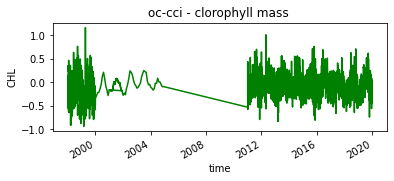

In [16]:
plt.figure(figsize=(6,2))
np.log10(mean_chl).plot(x ="time" , color='green',linestyle='-')
plt.title('oc-cci - clorophyll mass ')